In [ ]:
pip install pandas

In [ ]:
pip install openpyxl

In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib

In [ ]:
pip install scikit-learn

In [ ]:
pip install plotly

In [ ]:
pip install hdbscan

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import hdbscan
from sklearn.preprocessing import StandardScaler

## TF-IDF

In [19]:
df_processed = pd.read_excel('cyberbullying_train_complete_sentences.xlsx', sheet_name='Superanotator')
df_processed.head(5)

,text,label1,label2,label3,LABEL,"1. Sarkazm uszczypliwy, dokuczliwy -> mowa nienawiści"
0,Dla mnie faworytem do tytułu będzie Cracovia. ...,0,0,0,0.0,NaN
1,@anonymized_account @anonymized_account Brawo ...,0,0,0,0.0,NaN
2,"@anonymized_account @anonymized_account Super,...",1,0,1,1.0,Kolumna Label
3,@anonymized_account @anonymized_account Musi. ...,0,0,0,0.0,201-300 Iza
4,"Odrzut natychmiastowy, kwaśna mina, mam problem",0,0,0,0.0,301-400 Julita


In [20]:
df_processed = df_processed.drop(columns=["label1", "label2", "label3", "1. Sarkazm uszczypliwy, dokuczliwy -> mowa nienawiści"])

In [21]:
df_processed = df_processed.dropna(axis=0, how='any', subset=None, inplace=False)


In [22]:
df_processed.shape

(599, 2)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# Dopasowanie modelu TF-IDF i przekształcenie zdań w wektory
tfidf_matrix = vectorizer.fit_transform(df_processed['text'])

# Wydrukowanie wynikowych wektorów TF-IDF
print(tfidf_matrix.toarray())

# Możesz także wydrukować słownictwo, które zostało przypisane do każdego wektora
print(vectorizer.get_feature_names_out())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['00' '01' '10' ... 'żywych' 'żyłeś' 'żółci']


In [24]:
tfidf_dense = tfidf_matrix.toarray()  
standardized_data = StandardScaler().fit_transform(tfidf_dense)

In [25]:
standardized_data.shape

(599, 2781)

In [26]:
from sklearn.manifold import TSNE
import plotly.express as px

tfidf_tsne = TSNE(n_components=2, random_state=0, perplexity = 50).fit_transform(standardized_data)

df_tsne = pd.DataFrame(tfidf_tsne, columns=("Dim_1", "Dim_2"))
df_tsne['label'] = df_processed['LABEL']
df_tsne['text'] = df_processed['text']


fig = px.scatter(df_tsne, x='Dim_1', y='Dim_2', color='label',
                 hover_data={'text': True, 'label': True}, width=900, height=600)

fig.update_traces(marker=dict(size=10, opacity=0.7), selector=dict(mode='markers'))

fig.show()


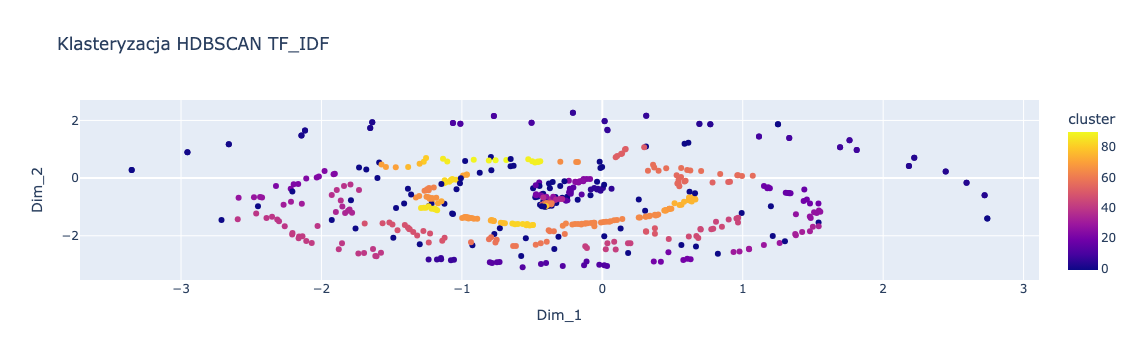

In [27]:
tfidf_tsne = TSNE(n_components=2, random_state=0, perplexity = 50).fit_transform(standardized_data)
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
df_tsne['cluster'] = clusterer.fit_predict(tfidf_tsne)

fig = px.scatter(df_tsne, x='Dim_1', y='Dim_2', color='cluster',
                 hover_data=['text'],
                 title='Klasteryzacja HDBSCAN TF_IDF')

fig.show()